

## data cleansing and exploratory data analysis for the Titanic dataset 

# 1. Basic EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

tit_df= pd.read_csv('titanic.csv', header=0, sep=',')#import titanic dataset


**Histogram plot that show the fraction of survivors and fatalities per class**

Text(0.5, 1.0, 'Survivors per class')

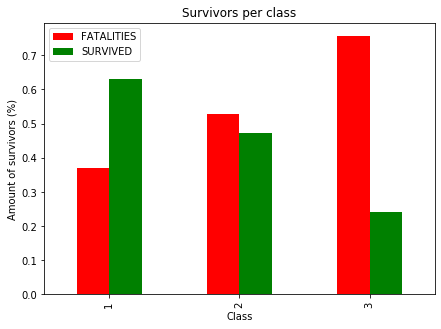

In [2]:
#first,we creating a table that count the amount of survivers and fatalities for each class
r_table = tit_df.groupby(['Pclass']).Survived.value_counts(normalize=True).unstack()
#then, we plot this table
r_table.plot(kind='bar', figsize=(7, 5),color=['r','g']).legend(labels=['FATALITIES','SURVIVED'])
plt.ylabel('Amount of survivors (%)')
plt.xlabel('Class')
plt.title('Survivors per class')

**scatterplot of Age vs. Fare for all passengers** 

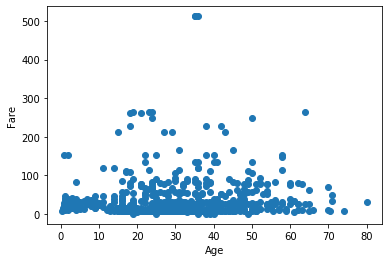

In [3]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('Age')
plt.ylabel('Fare')
ax.scatter(tit_df.Age,tit_df.Fare)#plot scatter of age and fare

plt.show()

**scatterplot of Age vs. Fare for all passengers, separating the different classes with different colors of markers** 

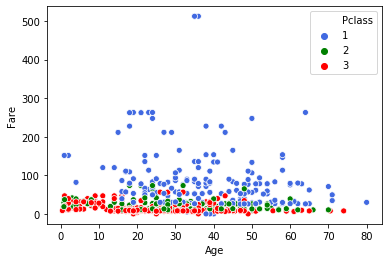

In [4]:
#plot with sns 
scat_tit=sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Pclass',
    data=tit_df,
    palette=['royalblue','g','red'])

**scatterplot of Age vs. Fare for all passengers, separating both the classes (using colors) and gender (using different symbols/markers).**

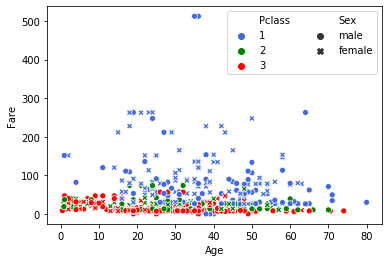

In [5]:
gen_tit = tit_df.groupby(['Sex']).Pclass.value_counts().unstack()#create a table that count by grouping by class and gender
scat_tit=sns.scatterplot(x='Age',y='Fare',hue='Pclass',style='Sex',data=tit_df,palette=['royalblue','g','red'])
scat_tit.legend(ncol=2)#two cols legend

**two line plots on the same graph - one shows the average age for each class, and the other shows the average fare for each class.** 

Text(0.5, 1.0, 'mean for age and fare')

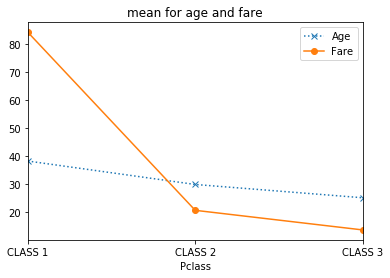

In [6]:
mean_tit=tit_df.groupby(['Pclass']).mean()[['Age','Fare']]#create a table for avarege of age,fare groupby classes
positions=(1,2,3)#ticks for x axis (class) 
labels=("CLASS 1","CLASS 2","CLASS 3")#labels for x axis
mean_tit.plot(style=['x:','o-']).legend(loc='upper middle')#plot with different style for lines
plt.xticks(positions,labels)#fix x axis ticks for classes
plt.title('mean for age and fare')

**Pearson correlation coefficient for age and fare.** 

In [7]:
tit_df[['Age','Fare']].corr(method ='pearson')

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


**histogram of ages, another one of ages only for passengers that survived, and a last one for passengers that didn't survive.**

Text(0.5, 1.0, 'Age hist for fatalities')

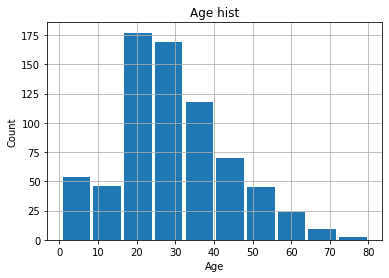

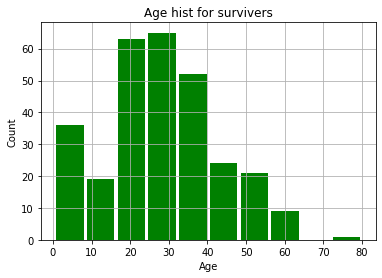

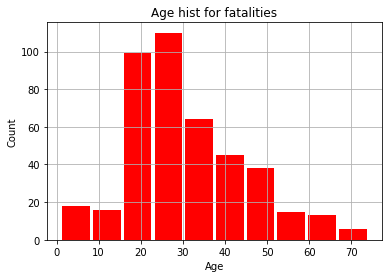

In [8]:
tit_df.hist(['Age'],rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age hist')

tit_df.loc[tit_df.Survived==1].hist(['Age'],color='g',rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age hist for survivers')

tit_df.loc[tit_df.Survived==0].hist(['Age'],color='r',rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age hist for fatalities')


**analyse with the range of ages:**
<br>
0-10:we can see that there is more survivers than fatalities.
<br>
15-30:we can see more fatalities then survivers.
<br>
60+:we can see that there is almost no survivers left.

**subplots.**

Text(0, 0.5, 'Frequency')

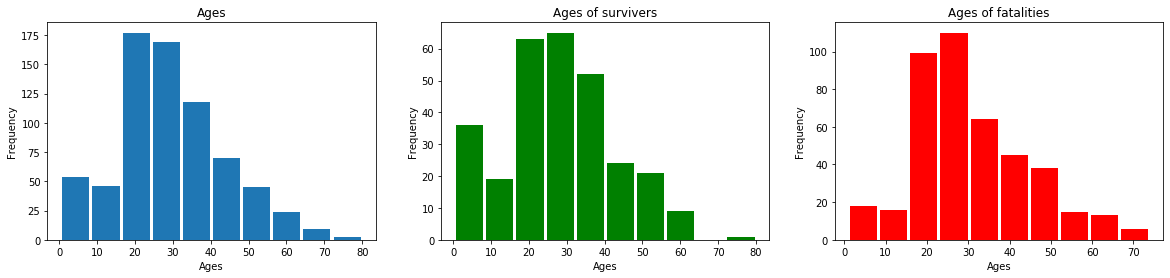

In [9]:
fig = plt.figure(figsize=(20, 4))

fig1=fig.add_subplot(1,3,1)
fig2=fig.add_subplot(1,3,2)
fig3=fig.add_subplot(1,3,3)  

fig1.hist(tit_df['Age'],rwidth=0.9)
fig1.set_title('Ages')
fig1.set_xlabel('Ages')
fig1.set_ylabel('Frequency')

fig2.hist(tit_df.Age[tit_df.Survived==1],color='g',rwidth=0.9)
fig2.set_title('Ages of survivers')
fig2.set_xlabel('Ages')
fig2.set_ylabel('Frequency')

fig3.hist(tit_df.Age[tit_df.Survived==0],color='r',rwidth=0.9)
fig3.set_title('Ages of fatalities')
fig3.set_xlabel('Ages')
fig3.set_ylabel('Frequency')


# 2. Data cleansing - missing values


**missing values for each one of the variables..** 


In [10]:
mis_val=tit_df.isnull().sum()
mis_val.to_frame('Num of NaNs')

,Num of NaNs
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Examing passengers for which 'embarked' has missing values.** 

In [11]:
tit_df[tit_df['Embarked'].isna()]#locate rows with miss embarked values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


both have the same :ticket number, fare, cabin(and sex)

**handle the missing values of 'embarked'.**

In [12]:
tit_df['Embarked'].value_counts()#check about freq of embarked places

tit_df.Embarked.fillna(tit_df.Embarked.mode()[0], inplace = True)#fill nans with most common embarked value

since embarked varible have only 3 places to embarked from, i decided to fill this two missing values with the place with the the number of commuters embarked which is S(Southampton).
i used the mode() fun which fill with most common value.


**A. Delete the value for the fare of a random passenger. The generation of a random integer is unique to each student (or couple of students submitting together - see code below. The two digits number should be replaced with the last two digits of your own ID, or one of the students' IDs).**

**B. Now, find the single passenger for which the ‘fare’ value is missing. Take the median fare for passengers that belong to the same class and embarked on the same port, and use the median to fill in the missing value for this passenger.**

In [13]:
from random import seed
from random import randint
# seed random number generator
seed(45)  #replace with the last two digits of your ID
value = randint(0, 890)
print(value)

tit_df.Fare.loc[tit_df.PassengerId==278]=np.nan#change fare value of passnger 278 to nan

print(tit_df[tit_df.Fare.isna()])#print the row of missing fare value passenger

med_278=tit_df.loc[(tit_df.Pclass==2 )&(tit_df.Embarked=='S')]#create table of passenger with same class and embarked place 
tit_df.Fare.fillna(med_278.Fare.median(),inplace=True)#fill nan with median fare of new table 

tit_df.Fare.isna().sum()#check that nan has converted

278
     PassengerId  Survived  Pclass                         Name   Sex  Age  \
277          278         0       2  Parkes, Mr. Francis "Frank"  male  NaN   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
277      0      0  239853   NaN   NaN        S  


0

**Fill in the missing valies for the age variable, using the median.**

In [14]:
tit_df.Age.fillna(tit_df.Age.median(),inplace=True)#change age missing vals to median

tit_df.Age.isnull().sum()#check that 177 nans are gone

0

# 3. Data cleansing - outliers


**Examine outliers in the age variable, using boxplot.** 

66

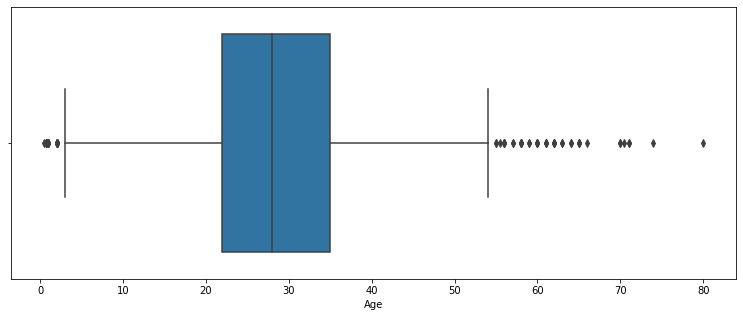

In [15]:
out_fig= plt.figure(figsize=(13, 5))
sns.boxplot(tit_df.Age)
Q1 = np.percentile(tit_df['Age'], 25)
Q3 = np.percentile(tit_df['Age'], 75)
IQR = Q3-Q1
age_outlier_rows = tit_df[(tit_df['Age'] < Q1 - 1.5*IQR) | (tit_df['Age'] > Q3 + 1.5*IQR)].index
len(age_outlier_rows)

this plot implement the interquartilerange(between 25%-75%) the line in the middle show the median and the dots that out the borders represent the outliers.
<br>
according to the boxplot , there is 66 outliers in age varible 

**Examine outliers in the age variable using histogram./median and turn the detected outliers to NaN**

there is:  7 ouliers


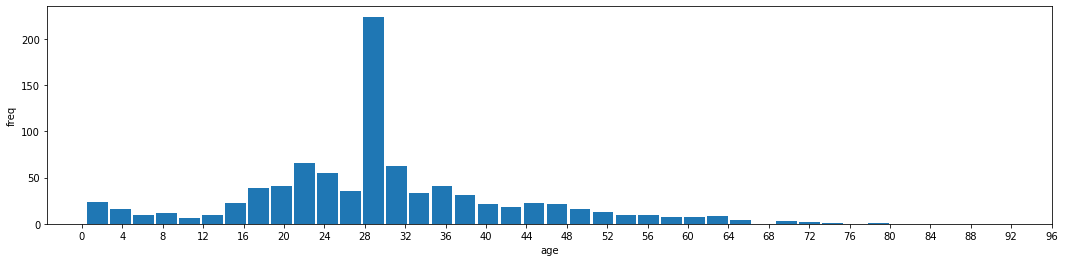

In [16]:
plt.figure(figsize=(18, 4))
plt.hist(tit_df.Age,bins=35,rwidth=0.9)#high bins resolution for better perspective
plt.xlabel('age')
plt.ylabel('freq')
plt.xticks(np.arange(0, 100, step=4))#jumps of 4 in X axis for better view on age distribution
print('there is:',sum(tit_df.Age>68),'ouliers') #how many outlier there is

#check that with median method i get the same result
#score = (tit_df['Age']-tit_df['Age'].mean()) / tit_df['Age'].std()
#outliers = abs(score) > 3
#sum(outliers)

tit_df.loc[tit_df.Age>68]=np.nan#change all the outliner to nans


**due to the range of the threshold of the boxplot (IQR) and because we talk about ages , i choose to represent the outliner with a hist graph with small tick on x axis to get better resolution of the age distribution**

**fill in the new missing values of age, using avg.**

In [18]:
tit_df.Age.fillna(tit_df.Age.mean(),inplace=True)#fill nans with avg
tit_df.Age.isnull().sum()#check that 7 nans are gone

0